<a href="https://colab.research.google.com/github/Bryan-eng-lng/AI-Translatify/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:00<00:00, 1.63GB/s]
100% 163M/163M [00:00<00:00, 1.60GB/s]


Lets Explore the data and see the images

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


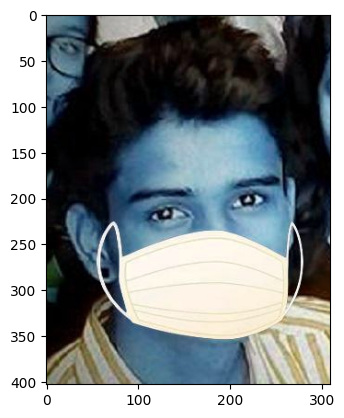

In [5]:
image = cv2.imread("/content/data/with_mask/with_mask_1000.jpg")

plt.imshow(image)
plt.show()

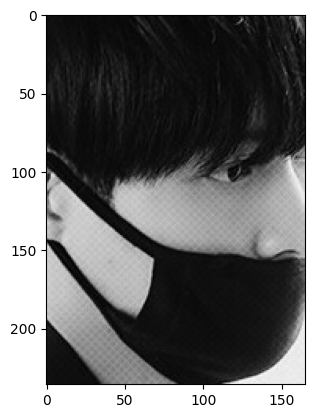

In [6]:
image2 = cv2.imread("/content/data/with_mask/with_mask_1003.jpg")

plt.imshow(image2)
plt.show()

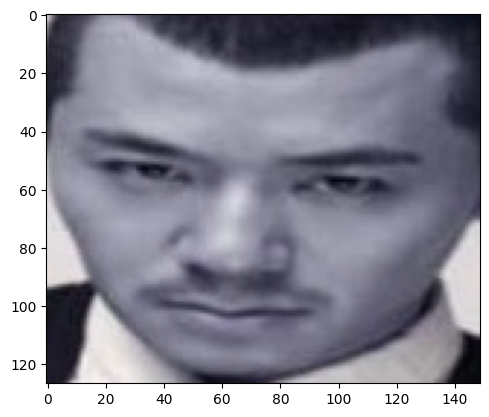

In [7]:
image3 = cv2.imread("/content/data/without_mask/without_mask_100.jpg")

plt.imshow(image3)
plt.show()

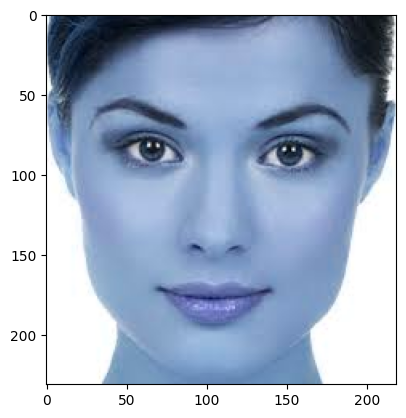

array([[[243, 252, 255],
        [235, 248, 255],
        [222, 236, 255],
        ...,
        [188, 192, 193],
        [251, 255, 255],
        [247, 252, 251]],

       [[243, 252, 255],
        [239, 252, 255],
        [174, 191, 212],
        ...,
        [180, 184, 185],
        [251, 255, 255],
        [251, 255, 255]],

       [[243, 252, 255],
        [239, 252, 255],
        [146, 163, 184],
        ...,
        [142, 146, 147],
        [235, 239, 240],
        [251, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
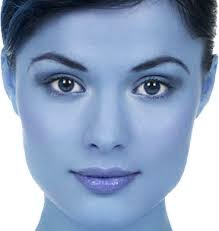

In [8]:
image4 = cv2.imread("/content/data/without_mask/without_mask_1004.jpg")

plt.imshow(image4)
plt.show()
image4

In [9]:
print(len(os.listdir("/content/data/without_mask")))
print(len(os.listdir("/content/data/with_mask")))

3828
3725


Okay Data is Balanced  


In [10]:
with_mask_files = os.listdir("/content/data/with_mask")
without_mask_files = os.listdir("/content/data/without_mask")

Image Processing

1.Resize the Images



2.Convert the images to numpy arrays

In [11]:
with_mask_path = "/content/data/with_mask"

data = []

for img_file in with_mask_files:

  image = Image.open(os.path.join(with_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask"




for img_file in without_mask_files:

  image = Image.open(os.path.join(without_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(data)

7553

array([[[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [214, 215, 206],
        [223, 224, 218],
        [ 90,  90,  87]],

       [[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [213, 213, 204],
        [223, 224, 218],
        [ 90,  90,  87]],

       [[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [211, 211, 202],
        [223, 224, 218],
        [ 90,  90,  87]],

       ...,

       [[197, 186, 190],
        [197, 186, 190],
        [196, 185, 189],
        ...,
        [231, 213, 196],
        [238, 226, 214],
        [103,  93,  86]],

       [[210, 199, 203],
        [209, 198, 202],
        [207, 196, 200],
        ...,
        [232, 212, 195],
        [239, 224, 213],
        [103,  93,  85]],

       [[211, 202, 205],
        [210, 201, 204],
        [207, 198, 201],
        ...,
        [231, 206, 187],
        [241, 220, 204],
        [104,  87,  78]]], dtype=uint8)
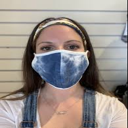

In [13]:
data[0]

In [14]:
base_dir = "/content/data"

data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,


)


train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (128,128),
    batch_size = 16,
    class_mode = "binary",
    subset = "training"
)

val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (128,128),
    batch_size = 16,
    class_mode = "binary",
    subset = "validation"
)




Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , GlobalAveragePooling2D , Dense , Dropout , Flatten , MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

In [16]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation="relu" , input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64 , (3,3) , activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128 , (3,3) , activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(128 , activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1 , activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer = Adam(learning_rate= 0.0001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [18]:
model.fit(
    train_gen,
    epochs = 10,
    validation_data = val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.7758 - loss: 0.4778 - val_accuracy: 0.8854 - val_loss: 0.2842
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.8862 - loss: 0.2794 - val_accuracy: 0.9119 - val_loss: 0.2311
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9001 - loss: 0.2408 - val_accuracy: 0.9245 - val_loss: 0.2046
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9123 - loss: 0.2152 - val_accuracy: 0.8987 - val_loss: 0.2486
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9172 - loss: 0.1982 - val_accuracy: 0.9318 - val_loss: 0.1673
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9291 - loss: 0.1803 - val_accuracy: 0.9430 - val_loss: 0.1540
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9343 - loss: 0.1596 - val_accuracy: 0.9536 - val_loss: 0.1495
Epoch 8/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9416 - loss: 0

In [19]:
model.evaluate(val_gen)

95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9563 - loss: 0.1412


[0.13364066183567047, 0.9582781195640564]

In [24]:
#val_gen.reset()

#y_pred_prob = model.predict(val_gen , verbose=1)


#y_true = val_gen.classes

95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step


In [28]:
#from sklearn.metrics import classification_report

#class_labels = list(val_gen.class_indices.keys())


#y_pred_binary = (y_pred_prob > 0.5).astype(int)

#print(classification_report(
   # y_true,
   # y_pred_binary,
   # target_names = class_labels,
   # digits = 2
#))

              precision    recall  f1-score   support

   with_mask       0.52      0.54      0.53       745
without_mask       0.53      0.51      0.52       765

    accuracy                           0.52      1510
   macro avg       0.52      0.52      0.52      1510
weighted avg       0.52      0.52      0.52      1510



In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


num_classes = train_gen.num_classes

base_model = MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_gen,
    epochs=12,
    validation_data=val_gen
)

base_model.trainable = True

Found 6043 images belonging to 2 classes.
Found 7553 images belonging to 2 classes.
Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/378 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.7997 - loss: 0.4247

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


378/378 ━━━━━━━━━━━━━━━━━━━━ 76s 177ms/step - accuracy: 0.8917 - loss: 0.2616 - val_accuracy: 0.9759 - val_loss: 0.0695
Epoch 2/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 57s 150ms/step - accuracy: 0.9765 - loss: 0.0701 - val_accuracy: 0.9878 - val_loss: 0.0414
Epoch 3/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.9805 - loss: 0.0510 - val_accuracy: 0.9881 - val_loss: 0.0370
Epoch 4/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.9872 - loss: 0.0420 - val_accuracy: 0.9919 - val_loss: 0.0304
Epoch 5/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.9867 - loss: 0.0411 - val_accuracy: 0.9850 - val_loss: 0.0401
Epoch 6/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.9860 - loss: 0.0382 - val_accuracy: 0.9931 - val_loss: 0.0251
Epoch 7/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9931 - val_loss: 0.0238
Epoch 8/12
378/378 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.9878 - loss: 0.0320 - val

In [47]:
val_gen.reset()

y_pred_prob = model.predict(val_gen)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()
y_true = val_gen.classes


473/473 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step


In [48]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=val_gen.class_indices.keys(),
    digits=3
))


              precision    recall  f1-score   support

   with_mask      0.995     0.995     0.995      3725
without_mask      0.995     0.995     0.995      3828

    accuracy                          0.995      7553
   macro avg      0.995     0.995     0.995      7553
weighted avg      0.995     0.995     0.995      7553

